In [139]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb

from matplotlib.path import Path
import matplotlib.patches as patches
#plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

In [101]:
alpha = 0.05
theta = 0.4
n = 20
p = 1 - m.sqrt(1 - alpha)
#p находится из теор части и предположения p_1 = p_2 в ней, т. е. (1 - p) * (1 - p) = 1 - alpha

$n (\theta_2 - X_{(n)} ) \sim exp(\theta_2 - \theta_1)$

$n \dfrac{\theta_2 - X_{(n)}}{\theta_2 - \theta_1} \sim exp(1)
\Rightarrow
\theta_2 \in \left(\dfrac{\theta_2 - \theta_1}{n} e_{\alpha/2} + X_{(n)}, 
\dfrac{\theta_2 - \theta_1}{n} e_{1 - \alpha/2} + X_{(n)}\right)$, где $e_\beta$ - $\beta$-квантиль экспоненциального распределения

Оценим $\theta_2 - \theta_1 \approx \left(X_{(n)} - X_{(1)}\right) \cdot \dfrac{n + 1}{n - 1}$

Отсюда получаем интервал
$$
\theta_2 \in \left(\dfrac{\Delta}{n} \cdot \dfrac{n + 1}{n - 1}\, e_{\alpha/2} + X_{(n)}, 
\dfrac{\Delta}{n} \cdot \dfrac{n + 1}{n - 1} \, e_{1 - \alpha/2} + X_{(n)}\right)$$
Аналогично
$$
\theta_1 \in \left(-\dfrac{\Delta}{n} \cdot \dfrac{n + 1}{n - 1}\, e_{\alpha/2} + X_{(1)}, 
-\dfrac{\Delta}{n} \cdot \dfrac{n + 1}{n - 1} \, e_{1 - \alpha/2} + X_{(1)}\right)$$

In [81]:
N = 1000

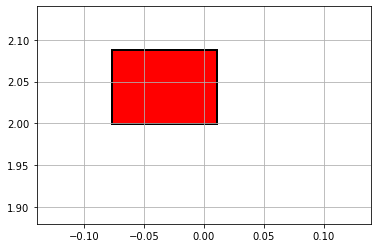

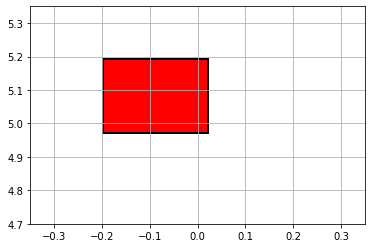

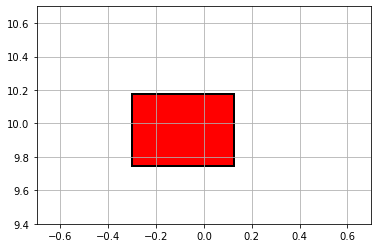

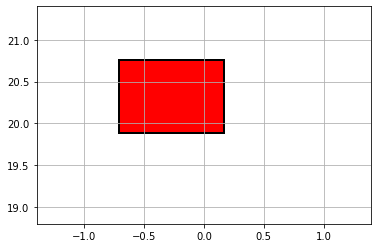

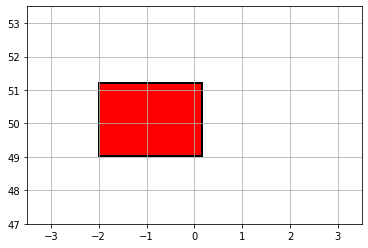

In [157]:
theta1 = 0; counter = 0
for theta2 in [2, 5, 10, 20, 50]: #2, 5
    counter = 0
    for iter in range(1):
        mini_sample = stat.uniform(loc = theta1, scale = theta2).rvs(100)
        maximum = mini_sample.max()
        minimum = mini_sample.min()
        power = 1 / (maximum - minimum)
        delta = maximum - minimum
        Rend1 = minimum - stat.expon().ppf(p/2) * delta * 1.01 / 99
        Lend1 = minimum - stat.expon().ppf(1 - p/2) * delta * 1.01 / 99
        
        Lend2 = maximum + stat.expon().ppf(p/2) * delta * 1.01 / 99
        Rend2 = maximum + stat.expon().ppf(1 - p/2) * delta * 1.01 / 99
        #print(Lend1, Rend1)
        
        verts = [
            (Lend1, Lend2),
            (Rend1, Lend2),
            (Rend1, Rend2),
            (Lend1, Rend2),
            (Lend1, Lend2),
        ]
        codes = [
            Path.MOVETO,
            Path.LINETO,
            Path.LINETO,
            Path.LINETO,
            Path.CLOSEPOLY,
        ]
        
        path = Path(verts, codes)
        
        fig, ax = plt.subplots()
        patch = patches.PathPatch(path, facecolor='red', lw=2)
        ax.add_patch(patch)
        ax.set_xlim(-theta2 * 0.07, theta2 * 0.07)
        ax.set_ylim(theta2 * 0.94, theta2 * 1.07)
        ax.grid(True, which = 'both')
        plt.show()

## Альтернативный способ получения критерия

###### Коэффициенты ниже получены методом подбора, особенно 141

In [134]:
N = 10000
p = 1 - m.sqrt(1 - alpha)
theta1 = 0; counter = 0
for theta2 in [2, 5, 10, 20, 50]:
    counter = 0
    for iter in range(N):
        mini_sample = stat.uniform(loc = theta1, scale = theta2).rvs(100)
        maximum = mini_sample.max()
        minimum = mini_sample.min()
        #Lend = A/(2* A - 1) * minimum - (1 - A)/(2* A - 1) * maximum
        
        param = 2 * p#* (1 - 4 * p)**2
        Lend = minimum - param * (maximum - minimum)
        Rend = maximum + param * (maximum - minimum)
        #print(Lend, minimum)
        if (Lend <= theta1 <= minimum - (maximum - minimum) * param / 141
            and Rend >= theta2 >= minimum + (maximum - minimum) * param / 141):
            counter += 1  
    print(counter)

9480
9510
9497
9483
9524


In [137]:
a = 9480 +\
9510 +\
9497 +\
9483 +\
9524

a / 50000

0.94988

beta_opt = 0.016308378213150225
For n = 20 theta = 0.1
len1 = 0.089 len2 = 0.424


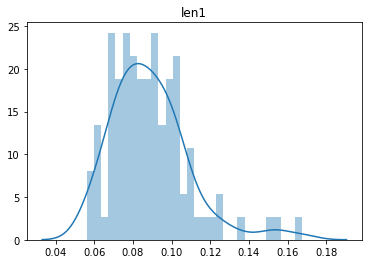



beta_opt = 0.016308378213150225
For n = 20 theta = 0.5
len1 = 0.468 len2 = 3.003


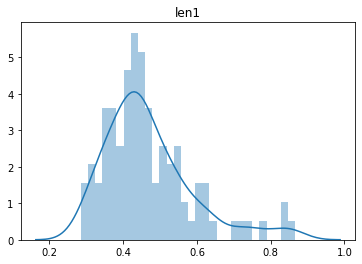



beta_opt = 0.016308378213150225
For n = 20 theta = 1
len1 = 0.94 len2 = 6.426


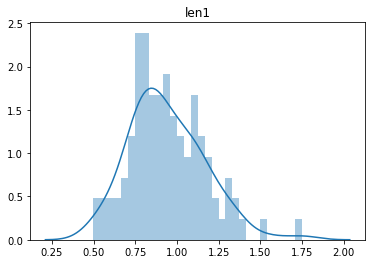



beta_opt = 0.016308378213150225
For n = 20 theta = 5
len1 = 4.622 len2 = 26.848


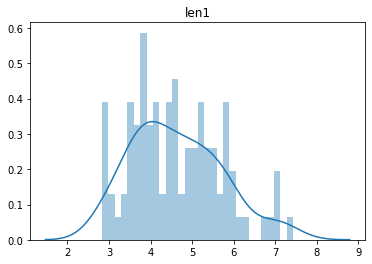



beta_opt = 0.019494031744005737
For n = 50 theta = 0.1
len1 = 0.057 len2 = 0.465


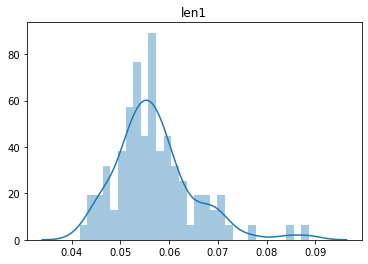



beta_opt = 0.019494031744005737
For n = 50 theta = 0.5
len1 = 0.284 len2 = 2.509


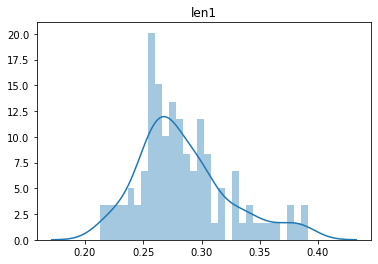



beta_opt = 0.019494031744005737
For n = 50 theta = 1
len1 = 0.556 len2 = 4.01


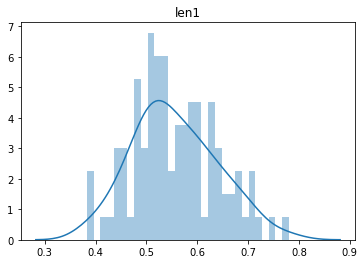



beta_opt = 0.019494031744005737
For n = 50 theta = 5
len1 = 2.788 len2 = 22.923


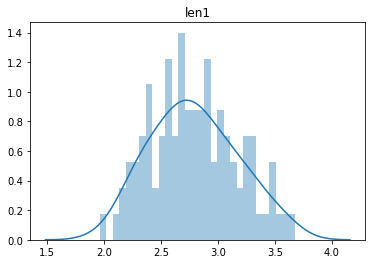



beta_opt = 0.021105062638465722
For n = 100 theta = 0.1
len1 = 0.04 len2 = 0.615


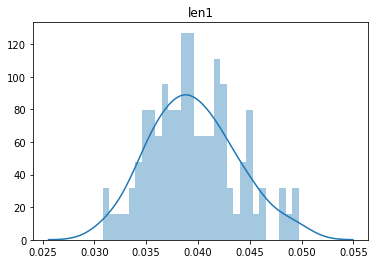



beta_opt = 0.021105062638465722
For n = 100 theta = 0.5
len1 = 0.198 len2 = 2.705


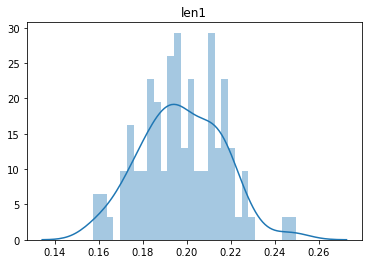



beta_opt = 0.021105062638465722
For n = 100 theta = 1
len1 = 0.394 len2 = 4.482


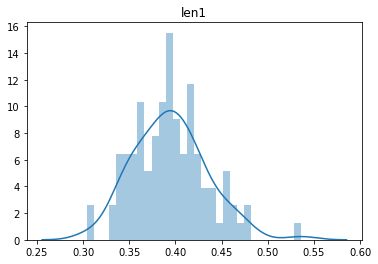



beta_opt = 0.021105062638465722
For n = 100 theta = 5
len1 = 1.953 len2 = 21.381


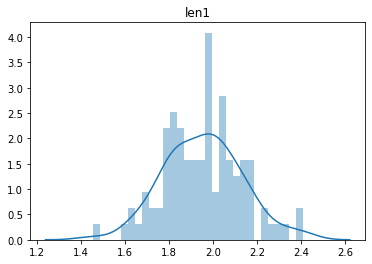

In [49]:
counter = 0

fun = lambda beta: -stat.gamma(n, 1).ppf(beta) + stat.gamma(n, 1).ppf(1 - alpha + beta)
#beta_opt = opt.minimize(fun, alpha/2, method = 'BFGS').x[0]

for n in [20, 50, 100]:
    for theta in [0.1, 0.5, 1, 5]:
        len1 = []; len2 = []
        beta_opt = opt.minimize(fun, x0 = alpha / 2, bounds = ((0, 1 - alpha),)).x[0]
        print('beta_opt =', beta_opt)
        for i in range(100):
            mini_sample = stat.expon(scale = 1/theta).rvs(n)
            mean = mini_sample.mean()
            summa = mean * n
            minimum = mini_sample.min()
            

            len1.append((stat.gamma(n, 1).ppf(1 - alpha + beta_opt) - stat.gamma(n, 1).ppf(beta_opt)) / summa)
            #print(stat.gamma(n, 1).ppf(alpha/2) / summa, stat.gamma(n, 1).ppf(1 - alpha/2) / summa)
            
            len2.append((stat.expon().ppf(1 - alpha/2) - stat.expon().ppf(alpha/2))/(n * minimum))
            #print(stat.expon().ppf(1 - alpha/2) / (n * minimum), stat.expon().ppf(alpha/2)/(n * minimum))
        print('For n =', n, 'theta =', theta)
        print('len1 =', round(np.array(len1).mean(), 3), 'len2 =', round(np.median(np.array(len2)), 3))
        sb.distplot(len1, bins = 30)
        plt.title('len1')
        plt.show()
        #sb.distplot(len2, bins = 30)
        #plt.title('len2')
        #plt.show()
        print('\n')
    

In [ ]:
stat.gamma(n, 1).ppf(1 - alpha/2)) - stat.gamma(n, 1).ppf(alpha/2)) / summa

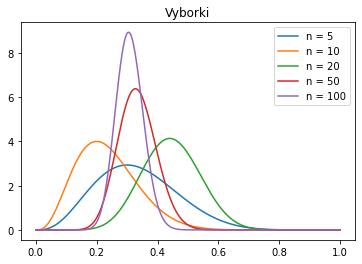

In [8]:
def generate(a, b, n):
    sample = []
    for i in range(n):
        theta = stat.beta(a, b).rvs()
        sample.append(stat.bernoulli(theta).rvs())
    return np.array(sample)

x = np.linspace(0, 1, 1000)

a = 2; b = 5
for n in [5, 10, 20, 50, 100]:
    sample = generate(a, b, n)
    sum = sample.sum()
    plt.title("Vyborki")
    plt.plot(x, stat.beta(sum + a, n - sum + b).pdf(x), label = 'n = ' + str(n))
    plt.legend()
#plt.plot(x, stat.cauchy(loc = 3).pdf(x))